In [3]:
from halo_nfw_model import *
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [4]:
M = 6e+13 * u.Msun
z = 0.1 * cu.redshift
h = OneHalo(M, z)
print(f'density at virial radius = {h.call_NFW_density(h.r_vir):.2f} * ρ_crit')
print(f'virial radius = {h.r_vir/h.r_s:.2f} * scale radius')
print(f'halo radius = {distance_to_npixel(h.r_vir*u.Mpc, z):.2f} pixels')

density at virial radius = 7095.66 * ρ_crit
virial radius = 4.92 * scale radius
halo radius = 31.25 pixels


/var/folders/cb/fs27ksbj131c_0qrcl46hk740000gn/T/ipykernel_63366/2983409733.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


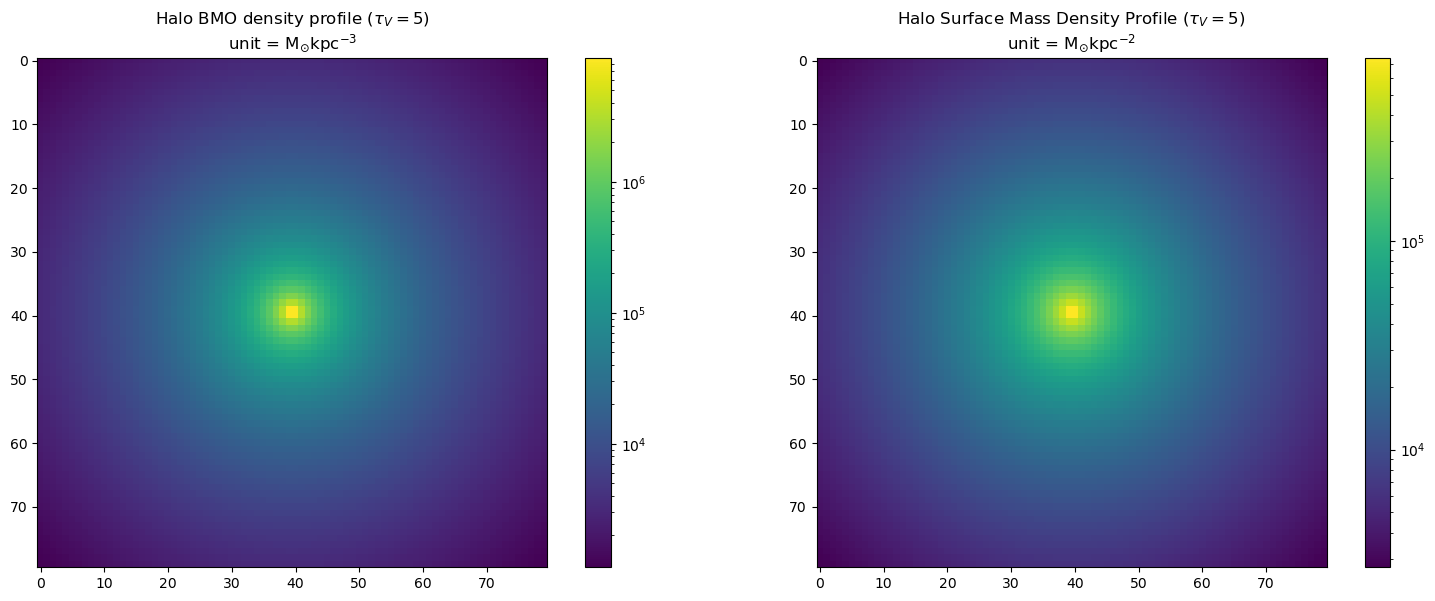

In [12]:
rho_map, Sigma_map = np.zeros((80, 80)), np.zeros((80, 80))
for iy, ix in np.ndindex(rho_map.shape):
    center = np.array((39.5, 39.5))
    point = np.array((iy, ix))
    dis_to_cen = np.linalg.norm(center - point)
    r = npixel_to_distance(dis_to_cen, z).value
    # rho_map[iy, ix] = h.call_NFW_density(r)
    # Sigma_map[iy, ix] = h.call_NFW_surface_mass_density(r)
    rho_map[iy, ix] = h.call_BMO_density(r)
    Sigma_map[iy, ix] = h.call_BMO_surface_mass_density(r)

fig, ax = plt.subplots(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title('Halo BMO density profile ($\\tau_V = 5$)\nunit = $\\mathrm{M}_{\\odot}\\mathrm{kpc}^{-3}$')
plt.imshow(rho_map, interpolation='None', norm=colors.LogNorm())
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Halo Surface Mass Density Profile ($\\tau_V = 5$)\nunit = $\\mathrm{M}_{\\odot}\\mathrm{kpc}^{-2}$')
plt.imshow(Sigma_map, interpolation='None', norm=colors.LogNorm())
plt.colorbar()
plt.tight_layout()

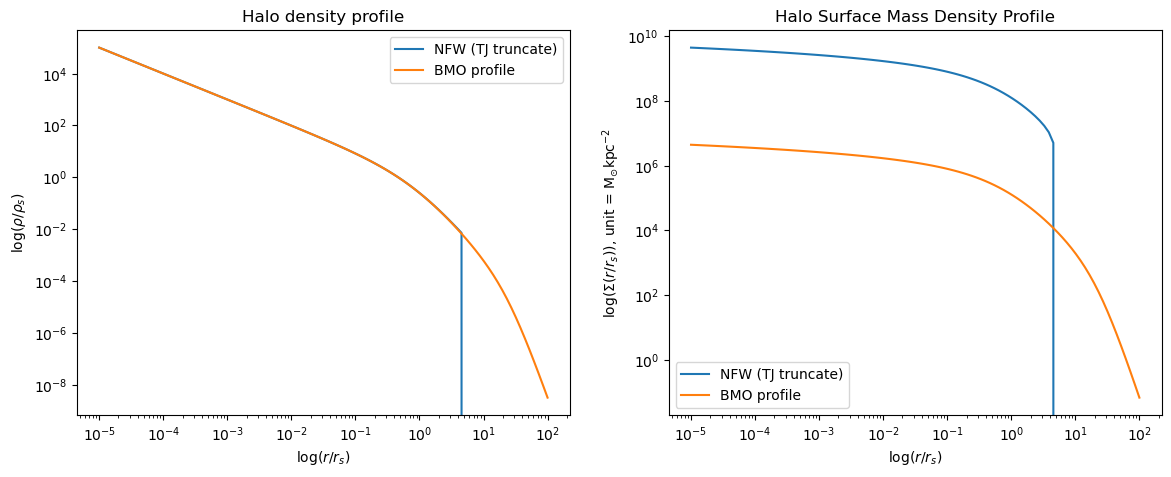

In [18]:
radii = np.logspace(-5, 2, num=100, base=10) * h.r_s
rhos_NFW = []
rhos_BMO = []
for r in radii:
    rhos_NFW.append(h.call_NFW_density(r) / h.delta_s / h.rho_crit)
    rhos_BMO.append(h.call_BMO_density(r) / h.delta_s / h.rho_crit)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14, 5))
ax1.loglog((radii/h.r_s), rhos_NFW, label='NFW (TJ truncate)')
ax1.loglog((radii/h.r_s), rhos_BMO, label='BMO profile')
ax1.set_title('Halo density profile')
ax1.set_xlabel(r'$\log(r/r_s)$')
ax1.set_ylabel(r'$\log(\rho/\rho_s)$')
ax1.legend()

Sigmas_NFW = []
Sigmas_BMO = []
for r in radii:
    Sigmas_NFW.append(h.call_NFW_surface_mass_density(r))
    Sigmas_BMO.append(h.call_BMO_surface_mass_density(r))

ax2.loglog((radii/h.r_s), Sigmas_NFW, label='NFW (TJ truncate)')
ax2.loglog((radii/h.r_s), Sigmas_BMO, label='BMO profile')
ax2.set_title('Halo Surface Mass Density Profile')
ax2.set_xlabel(r'$\log(r/r_s)$')
ax2.set_ylabel(r'$\log(\Sigma(r/r_s))$, unit = $\mathrm{M}_{\odot}\mathrm{kpc}^{-2}$')

ax2.legend()